# Milestone 1

## Muhammad Galang Al-Hakim

## HCK - 004

# Big Query

SELECT  
  CAST(limit_balance AS INT64) AS limit_balance, 
  CAST(sex AS INT64) AS sex, 
  CAST(education_level AS INT64) AS education_level, 
  CAST(marital_status AS INT64) AS marital_status, 
  CAST(age AS INT64) AS age, 
  CAST(pay_0 AS INT64) AS pay_0, 
  CAST(pay_2 AS INT64) AS pay_2, 
  CAST(pay_3 AS INT64) AS pay_3, 
  CAST(pay_4 AS INT64) AS pay_4, 
  CAST(pay_5 AS FLOAT64) AS pay_5, 
  CAST(pay_6 AS FLOAT64) AS pay_6, 
  CAST(bill_amt_1 AS INT64) AS bill_amt_1, 
  CAST(bill_amt_2 AS INT64) AS bill_amt_2, 
  CAST(bill_amt_3 AS INT64) AS bill_amt_3, 
  CAST(bill_amt_4 AS INT64) AS bill_amt_4, 
  CAST(bill_amt_5 AS INT64) AS bill_amt_5, 
  CAST(bill_amt_6 AS INT64) AS bill_amt_6, 
  CAST(pay_amt_1 AS INT64) AS pay_amt_1, 
  CAST(pay_amt_2 AS INT64) AS pay_amt_2, 
  CAST(pay_amt_3 AS INT64) AS pay_amt_3, 
  CAST(pay_amt_4 AS INT64) AS pay_amt_4, 
  CAST(pay_amt_5 AS INT64) AS pay_amt_5, 
  CAST(pay_amt_6 AS INT64) AS pay_amt_6, 
  CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 8000

# Import library

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

#save model
import joblib

# Data Loading

In [9]:
df = pd.read_csv(r'D:\Hacktiv8\Milestone\Milestone 2\h8dsft_P1M1_Muhamad_Fikri_Mumtaz.csv')
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


In [10]:
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [11]:
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [13]:
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


In [14]:
df.isna().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

In [15]:
df.duplicated().sum()

1

In [16]:
df = df.drop_duplicates()

In [17]:
df.nunique()

limit_balance                   59
sex                              2
education_level                  7
marital_status                   4
age                             49
pay_0                           11
pay_2                           10
pay_3                            9
pay_4                           10
pay_5                            9
pay_6                            8
bill_amt_1                    2643
bill_amt_2                    2592
bill_amt_3                    2549
bill_amt_4                    2504
bill_amt_5                    2482
bill_amt_6                    2461
pay_amt_1                     1415
pay_amt_2                     1372
pay_amt_3                     1302
pay_amt_4                     1214
pay_amt_5                     1194
pay_amt_6                     1189
default_payment_next_month       2
dtype: int64

# Exploration Data Analysis (EDA)

In [18]:
df.groupby('default_payment_next_month').mean()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
default_payment_next_month,,,,,,,,,,,,,,,,,,,,,
0,173924.431086,1.613139,1.831687,1.567196,35.113353,-0.203091,-0.299699,-0.311292,-0.341778,-0.377845,...,48298.728210,44261.138257,40793.230142,39607.151138,7073.215114,7168.932589,5826.000859,4935.654787,5493.515672,5989.127093
1,124598.425197,1.587402,1.916535,1.533858,35.488189,0.766929,0.530709,0.483465,0.392126,0.337008,...,48099.437795,43530.267717,41617.867717,40444.259843,3702.329134,2994.491339,2681.051969,3195.811024,2792.908661,3166.981102


In [19]:
df.groupby('default_payment_next_month').count()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
default_payment_next_month,,,,,,,,,,,,,,,,,,,,,
0,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329,...,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329
1,635,635,635,635,635,635,635,635,635,635,...,635,635,635,635,635,635,635,635,635,635


<Axes: xlabel='age'>

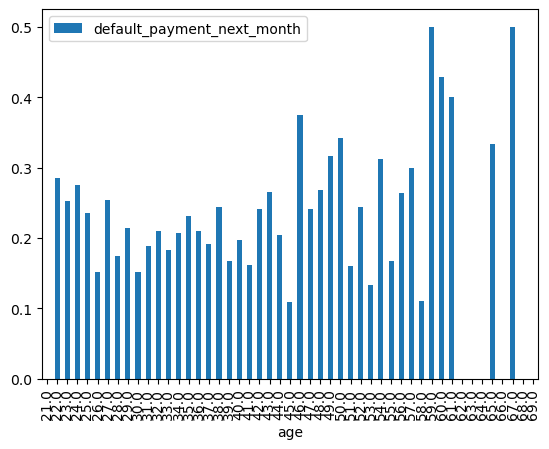

In [20]:
df.groupby('age')[['default_payment_next_month']].mean().plot(kind='bar')

<Axes: xlabel='sex'>

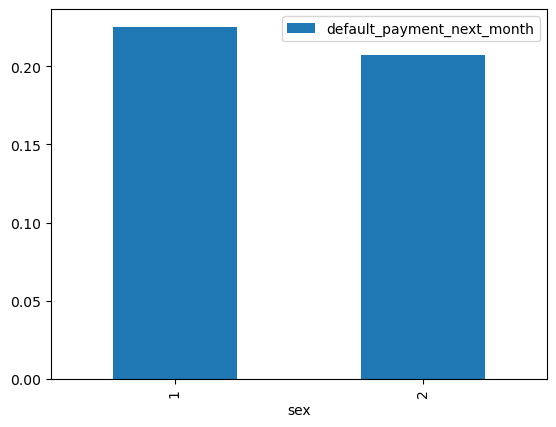

In [21]:
df.groupby('sex')[['default_payment_next_month']].mean().plot(kind='bar')

<Axes: xlabel='marital_status'>

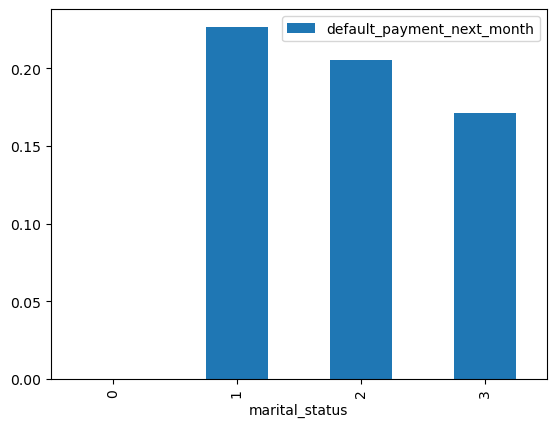

In [22]:
df.groupby('marital_status')[['default_payment_next_month']].mean().plot(kind='bar')

<Axes: xlabel='education_level'>

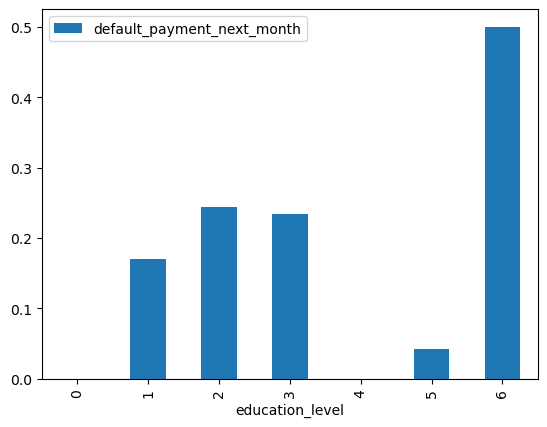

In [23]:
df.groupby('education_level')[['default_payment_next_month']].mean().plot(kind='bar')

<Axes: xlabel='limit_balance'>

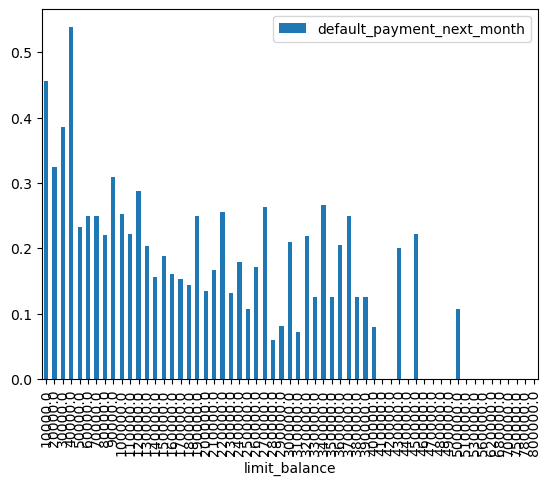

In [24]:
df.groupby('limit_balance')[['default_payment_next_month']].mean().plot(kind='bar')

# Data Preprocessing

## Data Split

In [78]:
num_col = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
cat_col = ['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [79]:
X = df.drop(['default_payment_next_month'],axis=1)
y = df['default_payment_next_month']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
print('Original set  ---> ',X.shape,y.shape,'\nTraining set  ---> ',X_train.shape,y_train.shape,'\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (2964, 23) (2964,) 
Training set  --->  (2371, 23) (2371,) 
Testing set   --->  (593, 23)  (593,)


# Handling Outliers

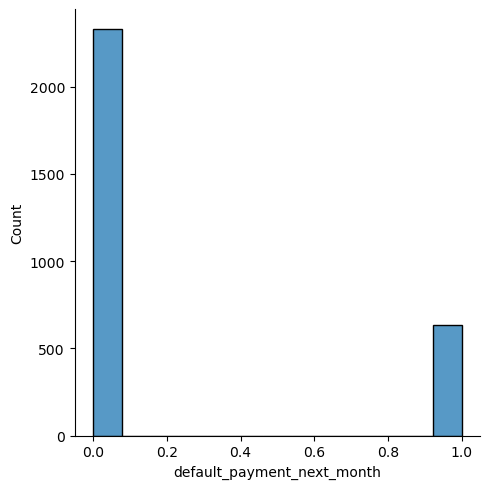

In [28]:
sns.displot(df['default_payment_next_month'])

In [69]:
# Fungsi untuk mendeteksi Outlier
for col in X_train[num_col].columns: 
  skewness = X_train[num_col][col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = X_train[num_col][col].mean() + 3*X_train[num_col][col].std()
    lower = X_train[num_col][col].mean() - 3*X_train[num_col][col].std()
  elif skewness>=-1 and skewness<=1:
    Q1 = X_train[num_col][col].quantile(0.25)
    Q3 = X_train[num_col][col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR    
  else:
    Q1 = X_train[num_col][col].quantile(0.25)
    Q3 = X_train[num_col][col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 3*IQR
    lower = Q1 - 3*IQR
  
  no_outliers = X_train[num_col][(X_train[num_col][col]>=lower) & (X_train[num_col][col]<=upper)]
  outliers = X_train[num_col][(X_train[num_col][col]<lower) | (X_train[num_col][col]>upper)]

In [70]:
# jumlah outlier
len(outliers)/len(num_col)

9.857142857142858

In [71]:
# Mentrimming Outlier
X_train.drop(list(outliers.index),inplace=True)
y_train.drop(list(outliers.index),inplace=True)

In [81]:
# calculate IQR for each feature in X_train
q1 = X_train.quantile(0.25)
q3 = X_train.quantile(0.75)
iqr = q3 - q1

# define the threshold for outlier detection
threshold = 3

# create a boolean mask for each feature indicating whether a value is an outlier
outlier_mask = ((X_train < (q1 - threshold*iqr)) | (X_train > (q3 + threshold*iqr))).any(axis=1)

# print the number of outliers detected
print("Number of outliers detected:", outlier_mask.sum())

# remove the outliers from X_train and y_train
X_train = X_train[~outlier_mask]
y_train = y_train[~outlier_mask]


Number of outliers detected: 566


In [30]:
X_train

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
785,240000.0,2,2,1,32.0,0.0,0.0,0.0,0.0,0.0,...,12869.0,14497.0,12262.0,8331.0,8000.0,1500.0,5000.0,1000.0,3000.0,2666.0
1670,10000.0,1,2,2,23.0,0.0,0.0,0.0,0.0,0.0,...,6457.0,6177.0,0.0,0.0,4400.0,1000.0,500.0,0.0,0.0,0.0
1025,10000.0,2,2,2,27.0,2.0,0.0,0.0,0.0,0.0,...,8345.0,8688.0,8865.0,9046.0,1124.0,1207.0,1000.0,177.0,181.0,0.0
2414,30000.0,2,2,2,22.0,-1.0,0.0,-1.0,-1.0,-1.0,...,5547.0,3312.0,3145.0,3022.0,1009.0,5572.0,3321.0,3154.0,3031.0,3339.0
2153,120000.0,2,2,1,54.0,1.0,-2.0,-2.0,-2.0,-1.0,...,-200.0,0.0,700.0,1935.0,0.0,0.0,200.0,700.0,1935.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,50000.0,2,3,1,32.0,2.0,2.0,2.0,2.0,2.0,...,46345.0,49231.0,48537.0,46774.0,2100.0,0.0,3600.0,1900.0,0.0,3285.0
79,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0.0,...,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0
1859,50000.0,2,2,3,47.0,2.0,2.0,2.0,2.0,2.0,...,38954.0,39618.0,38852.0,39553.0,2000.0,1500.0,1600.0,0.0,1500.0,3000.0
2841,500000.0,2,2,1,42.0,0.0,0.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
cat_col

['sex',
 'education_level',
 'marital_status',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6']

In [73]:
X_test.pay_6.unique()

array([ 2.,  0., -2., -1.,  7.,  3.])

## Preprocessing

## Pipeline

In [83]:
# define the preprocessing steps for categorical and numerical columns
cat_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[[1, 2], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3], [-2, -1, 0, 1,  2, 3], [-2, -1, 0, 2, 3], [-2, -1, 0, 2, 3], [-2, -1, 0, 2, 3], [-2, -1, 0, 2, 3], [-2, -1, 0, 2, 3]]))
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('pca',PCA(n_components=6))
])

# create the column transformer to apply the preprocessing steps to the data
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_col),
    ('num', num_transformer, num_col)
])

# create the pipeline to apply the logistic regression, decision tree classifier,
# support vector machine, random forest, naive bayes, knn, adaboost, and xgboost models
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', None)
])

# define the models to be applied in the pipeline
models = [LogisticRegression(), DecisionTreeClassifier(), SVC(), RandomForestClassifier(),
          GaussianNB(), KNeighborsClassifier(), AdaBoostClassifier()]

# train and evaluate each model using cross-validation
from sklearn.model_selection import cross_val_score

for model in models:
    pipeline.set_params(classifier=model)
    scores_train = cross_val_score(pipeline, X_train, y_train, cv=5)
    print(f'{type(model).__name__} Accuracy: {scores_train.mean():.3f} (+/- {scores_train.std():.3f})')

LogisticRegression Accuracy: 0.813 (+/- 0.012)
DecisionTreeClassifier Accuracy: 0.721 (+/- 0.017)
SVC Accuracy: 0.824 (+/- 0.016)
RandomForestClassifier Accuracy: 0.816 (+/- 0.019)
GaussianNB Accuracy: 0.804 (+/- 0.008)
KNeighborsClassifier Accuracy: 0.796 (+/- 0.009)
AdaBoostClassifier Accuracy: 0.805 (+/- 0.020)
